# Predicting House Prices with Regression using Scikit-learn
เอกสารประกอบ <br>
https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
The Data  

We will be using data from a Kaggle data set:
https://www.kaggle.com/harlfoxem/housesalesprediction
Feature Columns
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datasources/kc_house_data.csv')
df.sample(5)

id        date     price  bedrooms  bathrooms  sqft_living  \
14032  1498300775   6/24/2014  355000.0         2       2.25          930   
10220  1471610070   8/27/2014  350000.0         3       1.75         1360   
5631   4027700321  10/28/2014  420000.0         3       1.75         2390   
16078  8122600020   5/21/2014  200000.0         4       1.00         1310   
20845  1425069103   7/18/2014  750000.0         3       2.50         2620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
14032       747     2.0           0     0  ...      8         630   
10220     18123     1.0           0     0  ...      8        1360   
5631      11242     1.0           0     0  ...      7        1290   
16078      5200     1.5           0     0  ...      6        1160   
20845     43832     2.0           0     0  ...      8        2620   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
14032            300      2007             0    98144  47.5844 -122.316   
10220              0      1983             0    98045  47.4716 -121.756   
5631            1100      1959             0    98155  47.7759 -122.272   
16078            150      1945             0    98126  47.5384 -122.370   
20845              0      2013             0    98053  47.6550 -122.009   

       sqft_living15  sqft_lot15  
14032            940        6000  
10220           1570       16817  
5631            2270        9650  
16078           1090        5180  
20845           2620      120686  

[5 rows x 21 columns]

In [4]:
df = df.drop('id',axis=1)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
X = df.drop('price',axis=1)
y = df['price']

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
from sklearn import linear_model

In [13]:
len(X_train),len(y_train)

(15117, 15117)

In [15]:
X_train.values

array([[ 4.00000e+00,  1.00000e+00,  2.29000e+03, ..., -1.22290e+02,
         2.39000e+03,  6.30000e+03],
       [ 3.00000e+00,  2.25000e+00,  1.63000e+03, ..., -1.21998e+02,
         1.63000e+03,  3.13100e+03],
       [ 4.00000e+00,  3.50000e+00,  2.85000e+03, ..., -1.22192e+02,
         2.85000e+03,  5.70800e+03],
       ...,
       [ 2.00000e+00,  1.75000e+00,  1.80000e+03, ..., -1.22191e+02,
         1.94000e+03,  7.40000e+03],
       [ 3.00000e+00,  2.00000e+00,  1.50000e+03, ..., -1.21967e+02,
         1.58000e+03,  1.40130e+04],
       [ 2.00000e+00,  1.00000e+00,  1.16000e+03, ..., -1.22380e+02,
         1.16000e+03,  5.07600e+03]])

In [18]:
y_train.values

array([825000., 475000., 608500., ..., 380000., 330000., 425000.])

In [20]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train.values,y=y_train.values)

LinearRegression()

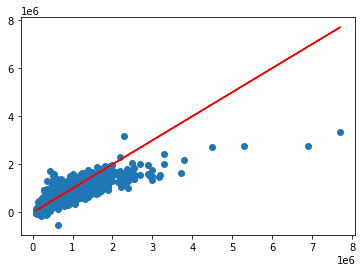

In [21]:
predictions = reg.predict(X_test)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [22]:
y_test.shape,predictions.shape

((6480,), (6480,))

In [23]:
y_test.values.reshape(6480, 1)

array([[ 319000.],
       [ 464625.],
       [ 489950.],
       ...,
       [ 422500.],
       [ 435000.],
       [1230000.]])

In [33]:
errors = y_test.values - predictions

<AxesSubplot:>

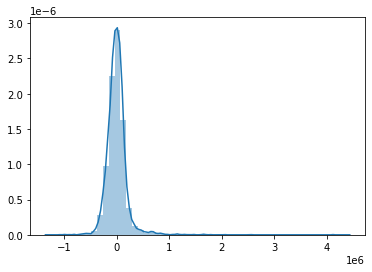

In [34]:
sns.distplot(errors)

# ทดลองปรับ Date แยกออกมาเป็น วันเดือนปี

In [36]:
df = pd.read_csv('../datasources/kc_house_data.csv')

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('id',axis=1)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [37]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train.values,y=y_train.values)

LinearRegression()

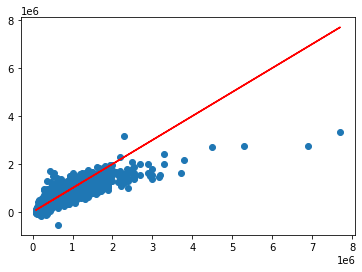

In [38]:
predictions = reg.predict(X_test)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# ทดลองปรับโดยตัดเอา features ที่คิดว่าไม่จำเป็น

In [65]:
df = pd.read_csv('../datasources/kc_house_data.csv')
df.T

0           1           2           3           4      \
id             7129300520  6414100192  5631500400  2487200875  1954400510   
date           10/13/2014   12/9/2014   2/25/2015   12/9/2014   2/18/2015   
price              221900      538000      180000      604000      510000   
bedrooms                3           3           2           4           3   
bathrooms               1        2.25           1           3           2   
sqft_living          1180        2570         770        1960        1680   
sqft_lot             5650        7242       10000        5000        8080   
floors                  1           2           1           1           1   
waterfront              0           0           0           0           0   
view                    0           0           0           0           0   
condition               3           3           3           5           3   
grade                   7           7           6           7           8   
sqft_above           1180        2170         770        1050        1680   
sqft_basement           0         400           0         910           0   
yr_built             1955        1951        1933        1965        1987   
yr_renovated            0        1991           0           0           0   
zipcode             98178       98125       98028       98136       98074   
lat               47.5112      47.721     47.7379     47.5208     47.6168   
long             -122.257    -122.319    -122.233    -122.393    -122.045   
sqft_living15        1340        1690        2720        1360        1800   
sqft_lot15           5650        7639        8062        5000        7503   

                    5           6           7           8           9      \
id             7237550310  1321400060  2008000270  2414600126  3793500160   
date            5/12/2014   6/27/2014   1/15/2015   4/15/2015   3/12/2015   
price            1.23e+06      257500      291850      229500      323000   
bedrooms                4           3           3           3           3   
bathrooms             4.5        2.25         1.5           1         2.5   
sqft_living          5420        1715        1060        1780        1890   
sqft_lot           101930        6819        9711        7470        6560   
floors                  1           2           1           1           2   
waterfront              0           0           0           0           0   
view                    0           0           0           0           0   
condition               3           3           3           3           3   
grade                  11           7           7           7           7   
sqft_above           3890        1715        1060        1050        1890   
sqft_basement        1530           0           0         730           0   
yr_built             2001        1995        1963        1960        2003   
yr_renovated            0           0           0           0           0   
zipcode             98053       98003       98198       98146       98038   
lat               47.6561     47.3097     47.4095     47.5123     47.3684   
long             -122.005    -122.327    -122.315    -122.337    -122.031   
sqft_living15        4760        2238        1650        1780        2390   
sqft_lot15         101930        6819        9711        8113        7570   

               ...       21587       21588       21589       21590  \
id             ...  7852140040  9834201367  3448900210  7936000429   
date           ...   8/25/2014   1/26/2015  10/14/2014   3/26/2015   
price          ...      507250      429000      610685    1.01e+06   
bedrooms       ...           3           3           4           4   
bathrooms      ...         2.5           2         2.5         3.5   
sqft_living    ...        2270        1490        2520        3510   
sqft_lot       ...        5536        1126        6023        7200   
floors         ...           2           3           2           2   


In [66]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('id',axis=1)
df = df.drop('condition',axis=1)
df = df.drop('view',axis=1)
df = df.drop('waterfront',axis=1)
df = df.drop('lat',axis=1)
df = df.drop('long',axis=1)
df = df.drop('grade',axis=1)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [67]:
df.T

0          1         2         3         4          5      \
price          221900.0  538000.00  180000.0  604000.0  510000.0  1230000.0   
bedrooms            3.0       3.00       2.0       4.0       3.0        4.0   
bathrooms           1.0       2.25       1.0       3.0       2.0        4.5   
sqft_living      1180.0    2570.00     770.0    1960.0    1680.0     5420.0   
sqft_lot         5650.0    7242.00   10000.0    5000.0    8080.0   101930.0   
floors              1.0       2.00       1.0       1.0       1.0        1.0   
sqft_above       1180.0    2170.00     770.0    1050.0    1680.0     3890.0   
sqft_basement       0.0     400.00       0.0     910.0       0.0     1530.0   
yr_built         1955.0    1951.00    1933.0    1965.0    1987.0     2001.0   
yr_renovated        0.0    1991.00       0.0       0.0       0.0        0.0   
sqft_living15    1340.0    1690.00    2720.0    1360.0    1800.0     4760.0   
sqft_lot15       5650.0    7639.00    8062.0    5000.0    7503.0   101930.0   
month              10.0      12.00       2.0      12.0       2.0        5.0   
year             2014.0    2014.00    2015.0    2014.0    2015.0     2014.0   

                   6         7         8         9      ...     21587  \
price          257500.00  291850.0  229500.0  323000.0  ...  507250.0   
bedrooms            3.00       3.0       3.0       3.0  ...       3.0   
bathrooms           2.25       1.5       1.0       2.5  ...       2.5   
sqft_living      1715.00    1060.0    1780.0    1890.0  ...    2270.0   
sqft_lot         6819.00    9711.0    7470.0    6560.0  ...    5536.0   
floors              2.00       1.0       1.0       2.0  ...       2.0   
sqft_above       1715.00    1060.0    1050.0    1890.0  ...    2270.0   
sqft_basement       0.00       0.0     730.0       0.0  ...       0.0   
yr_built         1995.00    1963.0    1960.0    2003.0  ...    2003.0   
yr_renovated        0.00       0.0       0.0       0.0  ...       0.0   
sqft_living15    2238.00    1650.0    1780.0    2390.0  ...    2270.0   
sqft_lot15       6819.00    9711.0    8113.0    7570.0  ...    5731.0   
month               6.00       1.0       4.0       3.0  ...       8.0   
year             2014.00    2015.0    2015.0    2015.0  ...    2014.0   

                  21588     21589      21590     21591     21592     21593  \
price          429000.0  610685.0  1010000.0  475000.0  360000.0  400000.0   
bedrooms            3.0       4.0        4.0       3.0       3.0       4.0   
bathrooms           2.0       2.5        3.5       2.5       2.5       2.5   
sqft_living      1490.0    2520.0     3510.0    1310.0    1530.0    2310.0   
sqft_lot         1126.0    6023.0     7200.0    1294.0    1131.0    5813.0   
floors              3.0       2.0        2.0       2.0       3.0       2.0   
sqft_above       1490.0    2520.0     2600.0    1180.0    1530.0    2310.0   
sqft_basement       0.0       0.0      910.0     130.0       0.0       0.0   
yr_built         2014.0    2014.0     2009.0    2008.0    2009.0    2014.0   
yr_renovated        0.0       0.0        0.0       0.0       0.0       0.0   
sqft_living15    1400.0    2520.0     2050.0    1330.0    1530.0    1830.0   
sqft_lot15       1230.0    6023.0     6200.0    1265.0    1509.0    7200.0   
month               1.0      10.0        3.0       2.0       5.0       2.0   
year             2015.0    2014.0     2015.0    2015.0    2014.0    2015.0   

                   21594     21595      21596  
price          402101.00  400000.0  325000.00  
bedrooms            2.00       3.0       2.00  
bathrooms           0.75       2.5       0.75  
sqft_living      1020.00    1600.0    1020.00  
sqft_lot         1350.00    2388.0    1076.00  
floors              2.00       2.0       2.00  
sqft_above       1020.00    1600.0    1020.00  
sqft_basement       0.00       0.0       0.00  
yr_built         2009.00    2004.0    2008.00  
yr_renovated        0.00       0.0       0.00  
sqft_living15    1020.00    1410.0   

In [68]:
reg = linear_model.LinearRegression()
reg.fit(X=X_train.values,y=y_train.values)

LinearRegression()

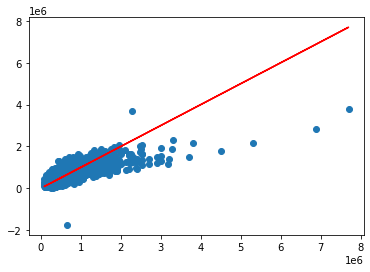

In [69]:
predictions = reg.predict(X_test)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')